# Multi-Class Classification Model for Human Activity Recognition with Smartphone Using Python Take 2
### David Lowe
### October 17, 2018

Template Credit: Adapted from a template made available by Dr. Jason Brownlee of Machine Learning Mastery. https://machinelearningmastery.com/

SUMMARY: The purpose of this project is to construct a prediction model using various machine learning algorithms and to document the end-to-end steps using a template. The Human Activities with Smartphone Dataset is a multi-class classification situation where we are trying to predict one of the six possible outcomes.

INTRODUCTION: Researchers collected the datasets from experiments that consist of a group of 30 volunteers with each person performed six activities wearing a smartphone on the waist. With its embedded accelerometer and gyroscope, the research captured measurement for the activities of WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING. The dataset has been randomly partitioned into two sets, where 70% of the volunteers were selected for generating the training data and 30% the test data. 

In iteration Take1, the script focuses on evaluating various machine learning algorithms and identify the algorithm that produces the best accuracy metric. Iteration Take1 established a baseline performance in terms of accuracy and processing time. For this iteration, we will examine the feasibility of using dimensionality reduction techniques to reduce the processing time while still maintaining an adequate level of prediction accuracy. The first technique we will explore is to eliminate collinear attributes based on a threshold of 85%.

CONCLUSION: From the previous iteration Take 1, the baseline performance of the ten algorithms achieved an average accuracy of 84.68%. Three algorithms (Linear Discriminant Analysis, Support Vector Machine, and Stochastic Gradient Boosting) achieved the top three accuracy scores after the first round of modeling. After a series of tuning trials, Stochastic Gradient Boosting turned in the top result using the training data. It achieved an average accuracy of 95.43%. Using the optimized tuning parameter available, the Stochastic Gradient Boosting algorithm processed the validation dataset with an accuracy of 96.23%, which was even better than the accuracy from the training data.

From the current iteration, the baseline performance of the ten algorithms achieved an average accuracy of 83.54%. Three algorithms (Linear Discriminant Analysis, Support Vector Machine, and Stochastic Gradient Boosting) achieved the top three accuracy scores after the first round of modeling. After a series of tuning trials, Support Vector Machine turned in the top result using the training data. It achieved an average accuracy of 93.34%. Using the optimized tuning parameter available, the Support Vector Machine algorithm processed the validation dataset with an accuracy of 93.82%, which was slightly better than the accuracy from the training data.

From the model-building activities, the number of attributes went from 561 down to 172 after eliminating 389 variables that are at least 85% collinear. The processing time went from 8 hours 16 minutes in iteration Take1 down to 2 hours and 7 minutes in iteration Take2. That was a reduction in model training and processing time of 74%.

In conclusion, the reduction in the number of attributes used still achieved an acceptable level of accuracy. Furthermore, the Support Vector Machine algorithm achieved the top-notch training and validation results. For the project, Support Vector Machine should be considered for further modeling or production use.

Dataset Used: Human Activity Recognition Using Smartphone Data Set

Dataset ML Model: Multi-class classification with numerical attributes

Dataset Reference: https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

One potential source of performance benchmarks: https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

The project aims to touch on the following areas:

* Document a predictive modeling problem end-to-end.
* Explore data cleaning and transformation options
* Explore non-ensemble and ensemble algorithms for baseline model performance
* Explore algorithm tuning techniques for improving model performance

Any predictive modeling machine learning project genrally can be broken down into about six major tasks:

1. Prepare Problem
2. Summarize Data
3. Prepare Data
4. Model and Evaluate Algorithms
5. Improve Accuracy or Results
6. Finalize Model and Present Results

## Section 1 - Prepare Problem

### 1.a) Load ibraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from datetime import datetime

from feature_selector import FeatureSelector

### 1.b) Load dataset

In [2]:
startTimeScript = datetime.now()

widthVector = [16] * 561
colNames = ["attr" + str(i) for i in range(1,562)]
x_training = pd.read_fwf('X_train.txt', widths=widthVector, header=None, names=colNames)
y_training = pd.read_csv('y_train.txt', names=["targetVar"])
entireDataset = pd.concat([x_training, y_training], axis=1)
x_test = pd.read_fwf('X_test.txt', widths=widthVector, header=None, names=colNames)
y_test = pd.read_csv('y_test.txt', names=["targetVar"])

### 1.c) Set up the key parameters to be used in the script

In [3]:
# Create one random seed number for reproducible results
seedNum = 888

# Set up a variable for the total number of attribute columns (totAttr)
totCol = len(entireDataset.columns)
totAttr = totCol-1

# Set up the number of row and columns for visualization display. dispRow * dispCol should be >= totAttr
dispCol = 5
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1
    
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

## Section 2 - Summarize Data
To gain a better understanding of the data that we have on-hand, we will leverage a number of descriptive statistics and data visualization techniques. The plan is to use the results to consider new questions, review assumptions, and validate hypotheses that we can investigate later with specialized models.

### 2.a) Descriptive statistics

#### 2.a.i) Peek at the data itself.

In [4]:
entireDataset.head(20)

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr553,attr554,attr555,attr556,attr557,attr558,attr559,attr560,attr561,targetVar
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,5
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.217198,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,5
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.082307,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,5
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,-0.269401,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,5
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,0.339526,0.140452,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,5


#### 2.a.ii) Dimensions of the dataset.

In [5]:
entireDataset.shape

(7352, 562)

#### 2.a.iii) Types of the attributes.

In [6]:
entireDataset.dtypes

attr1        float64
attr2        float64
attr3        float64
attr4        float64
attr5        float64
attr6        float64
attr7        float64
attr8        float64
attr9        float64
attr10       float64
attr11       float64
attr12       float64
attr13       float64
attr14       float64
attr15       float64
attr16       float64
attr17       float64
attr18       float64
attr19       float64
attr20       float64
attr21       float64
attr22       float64
attr23       float64
attr24       float64
attr25       float64
attr26       float64
attr27       float64
attr28       float64
attr29       float64
attr30       float64
              ...   
attr533      float64
attr534      float64
attr535      float64
attr536      float64
attr537      float64
attr538      float64
attr539      float64
attr540      float64
attr541      float64
attr542      float64
attr543      float64
attr544      float64
attr545      float64
attr546      float64
attr547      float64
attr548      float64
attr549      

#### 2.a.iv) Statistical summary of all attributes.

In [7]:
entireDataset.describe()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr553,attr554,attr555,attr556,attr557,attr558,attr559,attr560,attr561,targetVar
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,3.643362
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,1.744802
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,2.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,4.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,5.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,6.000000


#### 2.a.v) Summarize the levels of the class attribute

In [8]:
entireDataset.groupby('targetVar').size()

targetVar
1    1226
2    1073
3     986
4    1286
5    1374
6    1407
dtype: int64

#### 2.a.vi) Find columns with missing values

In [9]:
entireDataset.isnull().sum()[entireDataset.isnull().any()]

Series([], dtype: int64)

### 2.b) Data visualizations

##### 2.b.i) Univariate plots to better understand each attribute

In [10]:
attributeOnly = entireDataset.drop(columns=['targetVar'])

In [11]:
# # Histograms for each attribute
# attributeOnly.hist()
# pyplot.show()

In [12]:
# # Density plot for each attribute
# attributeOnly.plot(kind='density', subplots=True, layout=(dispRow,dispCol), sharex=False, sharey=False)
# pyplot.show()

In [13]:
# # Box and Whisker plot for each attribute
# attributeOnly.plot(kind='box', subplots=True, layout=(dispRow,dispCol), sharex=False, sharey=False)
# pyplot.show()

#### 2.b.ii) Multivariate plots to better understand the relationships between attributes

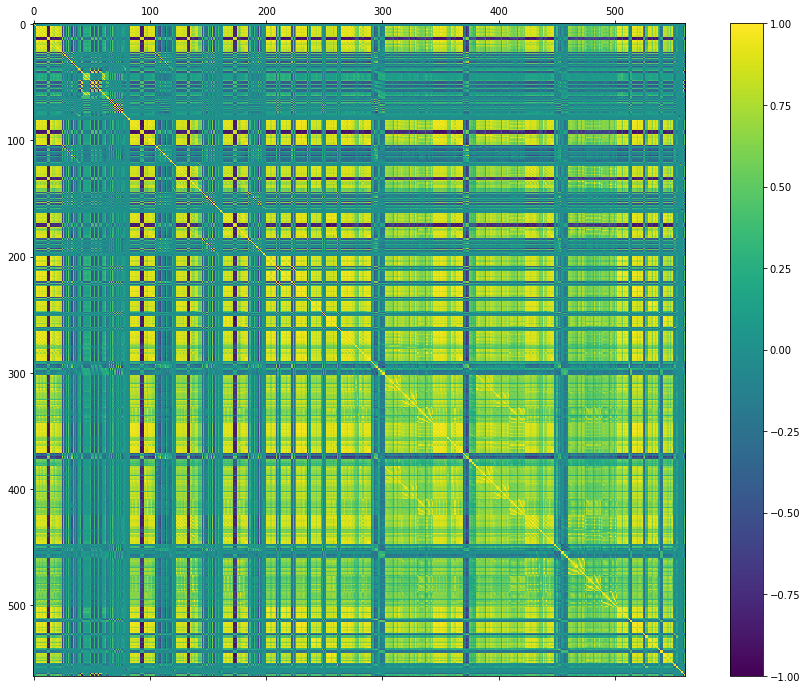

In [14]:
# Correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(attributeOnly.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

In [15]:
# # Scatterplot matrix
# scatter_matrix(attributeOnly)
# pyplot.show()

## Section 3 - Prepare Data
Some dataset may require additional preparation activities that will best exposes the structure of the problem and the relationships between the input attributes and the output variable. Some data-prep tasks might include:

* Cleaning data by removing duplicates, marking missing values and even imputing missing values.
* Feature selection where redundant features may be removed.
* Data transforms where attributes are scaled or redistributed in order to best expose the structure of the problem later to learning algorithms.

### 3.a) Data Cleaning

In [16]:
# Not applicable for this iteration of the project.

### 3.b) Feature Selection

In [17]:
fs = FeatureSelector(data = x_training, labels = y_training)

#### 3.b.i) Missing Values

In [18]:
fs.identify_missing(missing_threshold=0.5)

0 features with greater than 0.50 missing values.



In [19]:
# fs.missing_stats.head(10)

In [20]:
# missing_features = fs.ops['missing']
# missing_features[:10]

In [21]:
# fs.plot_missing()

#### 3.b.ii) Single Unique Value (low variance)

In [22]:
fs.identify_single_unique()

0 features with a single unique value.



In [23]:
# fs.unique_stats.sample(5)

In [24]:
# single_unique = fs.ops['single_unique']
# single_unique

In [25]:
# fs.plot_unique()

#### 3.b.iii) Collinear (highly correlated) Features

In [26]:
fs.identify_collinear(correlation_threshold=0.85)

389 features with a correlation magnitude greater than 0.85.



In [27]:
fs.record_collinear.head(20)

,drop_feature,corr_feature,corr_value
0,attr5,attr4,0.927461
1,attr6,attr4,0.851668
2,attr6,attr5,0.895510
3,attr7,attr4,0.998632
4,attr7,attr5,0.922803
5,attr8,attr4,0.920888
6,attr8,attr5,0.997347
7,attr8,attr6,0.891441
8,attr8,attr7,0.916106
9,attr9,attr5,0.894509


In [28]:
correlated_features = fs.ops['collinear']
correlated_features[:20]

['attr5',
 'attr6',
 'attr7',
 'attr8',
 'attr9',
 'attr10',
 'attr11',
 'attr12',
 'attr13',
 'attr14',
 'attr15',
 'attr16',
 'attr17',
 'attr18',
 'attr19',
 'attr20',
 'attr21',
 'attr22',
 'attr24',
 'attr27']

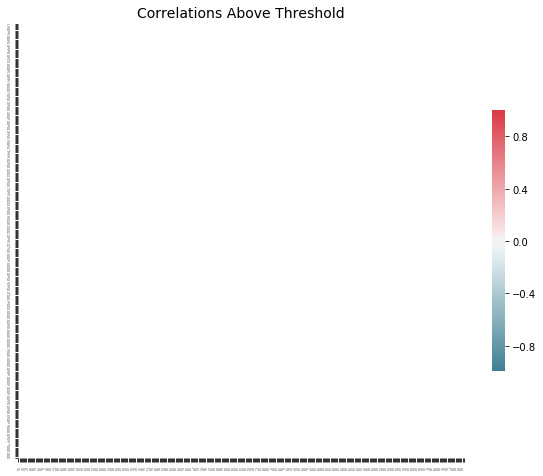

In [29]:
fs.plot_collinear()

#### 3.b.iv) Removing Features

In [30]:
# x_train_selected = fs.remove(methods = ['collinear'])
x_training.drop(correlated_features, axis=1, inplace=True)
x_training.shape

(7352, 172)

In [31]:
x_test.drop(correlated_features, axis=1, inplace=True)
x_test.shape

(2947, 172)

### 3.c) Data Transforms

In [32]:
# Not applicable for this iteration of the project.

### 3.d) Split-out training and validation datasets
We create a training dataset (variable name "training") and a validation dataset (variable name "validation").

In [33]:
# array = entireDataset.values
X_train = x_training.values
Y_train = y_training.values.ravel()
X_validation = x_test.values
Y_validation = y_test.values.ravel()
X_entire = X_train
Y_entire = Y_train

print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
print("X_validation.shape: {} Y_validation.shape: {}".format(X_validation.shape, Y_validation.shape))
print("X_entire.shape: {} Y_entire.shape: {}".format(X_entire.shape, Y_entire.shape))
print('Total time for data handling and visualization:',(datetime.now() - startTimeScript))

X_train.shape: (7352, 172) Y_train.shape: (7352,)
X_validation.shape: (2947, 172) Y_validation.shape: (2947,)
X_entire.shape: (7352, 172) Y_entire.shape: (7352,)
Total time for data handling and visualization: 0:00:36.151509


## 4. Model and Evaluate Algorithms
After the data-prep, we next work on finding a workable model by evaluating a subset of machine learning algorithms that are good at exploiting the structure of the training. The typical evaluation tasks include:

* Defining test options such as cross validation and the evaluation metric to use.
* Spot checking a suite of linear and nonlinear machine learning algorithms.
* Comparing the estimated accuracy of algorithms.

For this project, we will evaluate one linear, four non-linear and five ensemble algorithms:

Linear Algorithm: Linear Discriminant Analysis

Non-Linear Algorithms: Decision Trees (CART), Naive Bayes, k-Nearest Neighbors, and Support Vector Machine

Ensemble Algorithms: Bagged Decision Trees, Random Forest, Extra Trees, AdaBoost, and Stochastic Gradient Boosting

The random number seed is reset before each run to ensure that the evaluation of each algorithm is performed using the same data splits. It ensures the results are directly comparable.

### 4.a) Set test options and evaluation metric

In [34]:
# Run algorithms using 10-fold cross validation
num_folds = 10
scoring = 'accuracy'

In [35]:
# Set up Algorithms Spot-Checking Array
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier(random_state=seedNum)))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(random_state=seedNum)))
models.append(('BDT', BaggingClassifier(random_state=seedNum)))
models.append(('RF', RandomForestClassifier(random_state=seedNum)))
models.append(('ET', ExtraTreesClassifier(random_state=seedNum)))
models.append(('AB', AdaBoostClassifier(random_state=seedNum)))
models.append(('GBM', GradientBoostingClassifier(random_state=seedNum)))
results = []
names = []
metrics = []

In [36]:
# Generate model in turn
for name, model in models:
	startTimeModule = datetime.now()
	kfold = KFold(n_splits=num_folds, random_state=seedNum)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	metrics.append(cv_results.mean())
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
	print ('Model training time:',(datetime.now() - startTimeModule))
print ('Average metrics ('+scoring+') from all models:',np.mean(metrics))

C:\Users\user_j9bk3\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


LDA: 0.928452 (0.038658)
Model training time: 0:00:02.184290
CART: 0.849297 (0.041795)
Model training time: 0:00:12.515740
NB: 0.806853 (0.041266)
Model training time: 0:00:00.777789
KNN: 0.876906 (0.044894)
Model training time: 0:00:16.470293
SVM: 0.918255 (0.040304)
Model training time: 0:00:28.300833
BDT: 0.880986 (0.046018)
Model training time: 0:01:15.803767
RF: 0.893365 (0.035131)
Model training time: 0:00:06.363324
ET: 0.878675 (0.036881)
Model training time: 0:00:01.977553
AB: 0.407390 (0.077766)
Model training time: 0:01:11.117859
GBM: 0.914314 (0.044699)
Model training time: 0:10:12.048417
Average metrics (accuracy) from all models: 0.8354492383910086


### 4.b) Spot-checking baseline algorithms

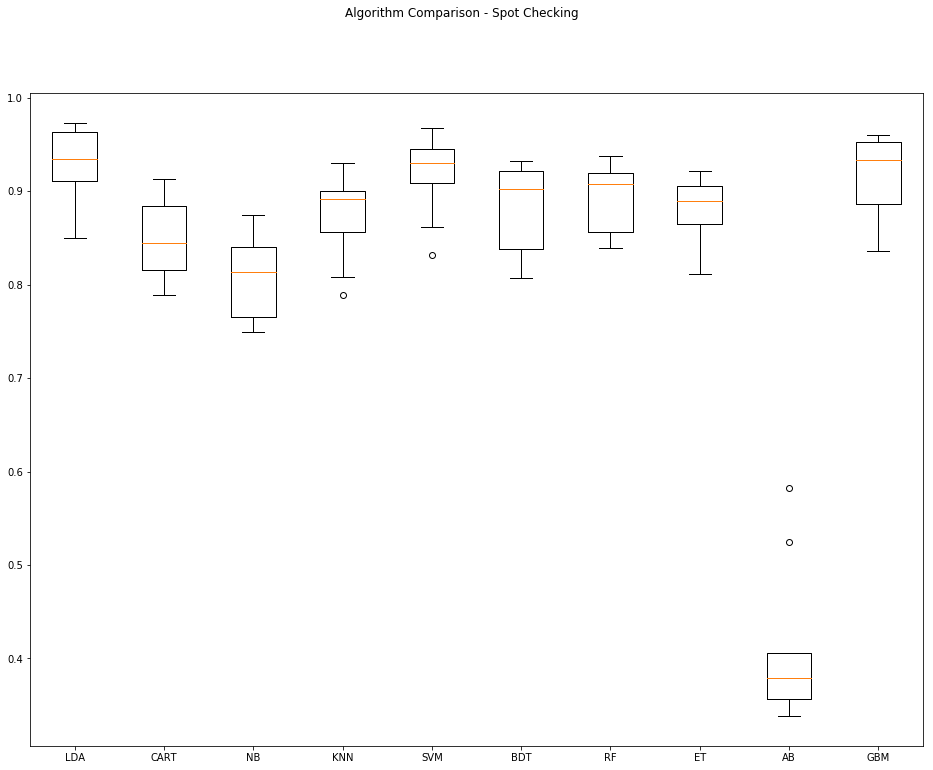

In [37]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 5 - Improve Accuracy
After we achieve a short list of machine learning algorithms with good level of accuracy, we can leverage ways to improve the accuracy of the models.

### 5.a) Algorithm Tuning

In [38]:
# Set up the comparison array
results = []
names = []

In [39]:
# Tuning algorithm #1 - Linear Discriminant Analysis
startTimeModule = datetime.now()
model1 = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=num_folds, random_state=seedNum)
cv_results = cross_val_score(model1, X_train, Y_train, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append('LDA')
msg = "%s: %f (%f)" % ('LDA', cv_results.mean(), cv_results.std())
print(msg)
print ('Model training time:',(datetime.now() - startTimeModule))

C:\Users\user_j9bk3\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


LDA: 0.928452 (0.038658)
Model training time: 0:00:02.006395


In [40]:
# Tuning algorithm #2 - Support Vector Machine
startTimeModule = datetime.now()
paramGrid2 = dict(C=np.array([1,3,5,7,9]))
model2 = SVC(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid2 = GridSearchCV(estimator=model2, param_grid=paramGrid2, scoring=scoring, cv=kfold)
grid_result2 = grid2.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
results.append(grid_result2.cv_results_['mean_test_score'])
names.append('SVM')
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.933487 using {'C': 9}
0.918254 (0.040308) with: {'C': 1}
0.929951 (0.035850) with: {'C': 3}
0.933215 (0.035601) with: {'C': 5}
0.931855 (0.035298) with: {'C': 7}
0.933487 (0.035030) with: {'C': 9}
Model training time: 0:03:40.479084


In [41]:
# Tuning algorithm #3 - Stochastic Gradient Boosting
startTimeModule = datetime.now()
paramGrid3 = dict(n_estimators=np.array([100,200,300,400,500]))
model3 = GradientBoostingClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid3 = GridSearchCV(estimator=model3, param_grid=paramGrid3, scoring=scoring, cv=kfold)
grid_result3 = grid3.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))
results.append(grid_result3.cv_results_['mean_test_score'])
names.append('GBM')
means = grid_result3.cv_results_['mean_test_score']
stds = grid_result3.cv_results_['std_test_score']
params = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.915533 using {'n_estimators': 400}
0.914309 (0.044705) with: {'n_estimators': 100}
0.915261 (0.043689) with: {'n_estimators': 200}
0.915261 (0.043512) with: {'n_estimators': 300}
0.915533 (0.044197) with: {'n_estimators': 400}
0.915397 (0.044916) with: {'n_estimators': 500}
Model training time: 1:49:16.217043


### 5.b) Compare Algorithms After Tuning

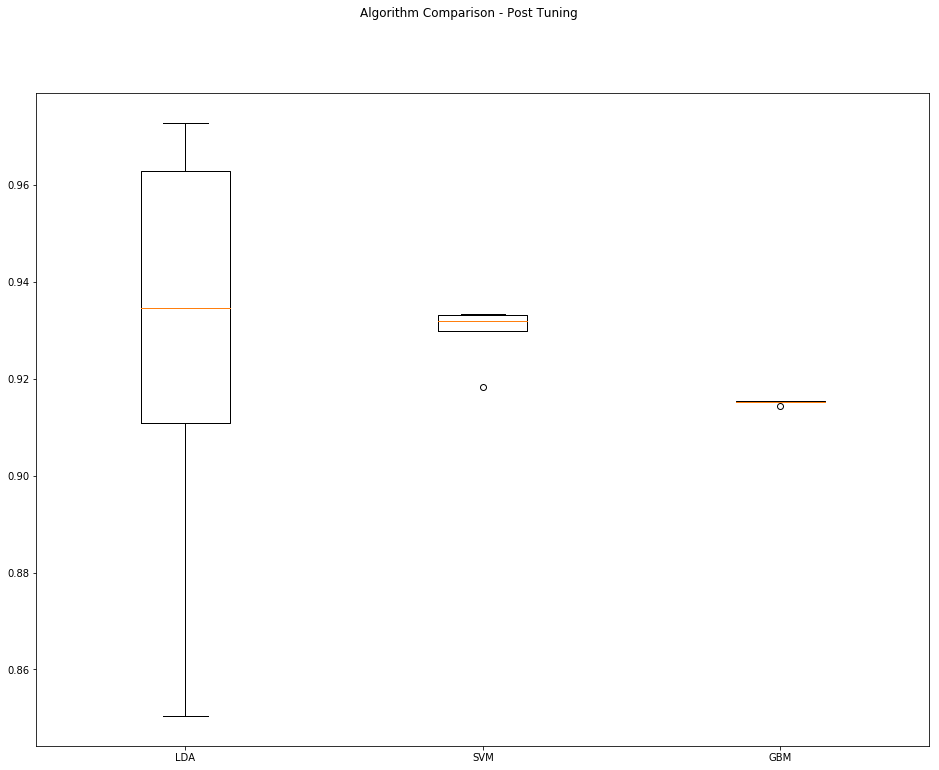

In [42]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Post Tuning')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 6 - Finalize Model
Once we have narrow down to a model that we believe can make accurate predictions on unseen data, we are ready to finalize it. Finalizing a model may involve sub-tasks such as:
* Using an optimal model tuned to make predictions on unseen data.
* Creating a standalone model using the tuned parameters
* Saving an optimal model to file for later use.

### 6.a) Predictions on validation dataset

In [43]:
model = SVC(random_state=seedNum)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9382422802850356
[[494   1   1   0   0   0]
 [ 29 428  14   0   0   0]
 [ 15  20 385   0   0   0]
 [  0   4   0 435  52   0]
 [  1   0   0  45 486   0]
 [  0   0   0   0   0 537]]
             precision    recall  f1-score   support

          1       0.92      1.00      0.95       496
          2       0.94      0.91      0.93       471
          3       0.96      0.92      0.94       420
          4       0.91      0.89      0.90       491
          5       0.90      0.91      0.91       532
          6       1.00      1.00      1.00       537

avg / total       0.94      0.94      0.94      2947



### 6.b) Create standalone model on entire training dataset

In [44]:
startTimeModule = datetime.now()
finalModel = SVC(random_state=seedNum)
finalModel.fit(X_entire, Y_entire)
print ('Model training time:',(datetime.now() - startTimeModule))

Model training time: 0:00:02.693919


### 6.c) Save model for later use

In [45]:
# modelName = 'finalModel_BinaryClass.sav'
# dump(finalModel, modelName)

print ('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 2:07:30.441362
